In [1]:
import sys
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats as st
import scipy

import peakutils

from datetime import datetime

import math
from scipy          import stats
from scipy.optimize import curve_fit

In [2]:
### Import functions from peak_functions

repository_path = os.path.abspath('../..')
sys.path.append(repository_path)

import blr_functions  as blr
import peak_functions as pf
import fit_functions  as fitf

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
plt.rcParams["figure.figsize"] = 9, 6
plt.rcParams["font.size"]      = 14

In [5]:
filename = '/Users/romoluque_c/LEGEND/BACON/datatest/run-11_20_2023-file_1.root'
infile   = uproot.open(filename)
RawTree  = infile['RawTree']

### Plot one event

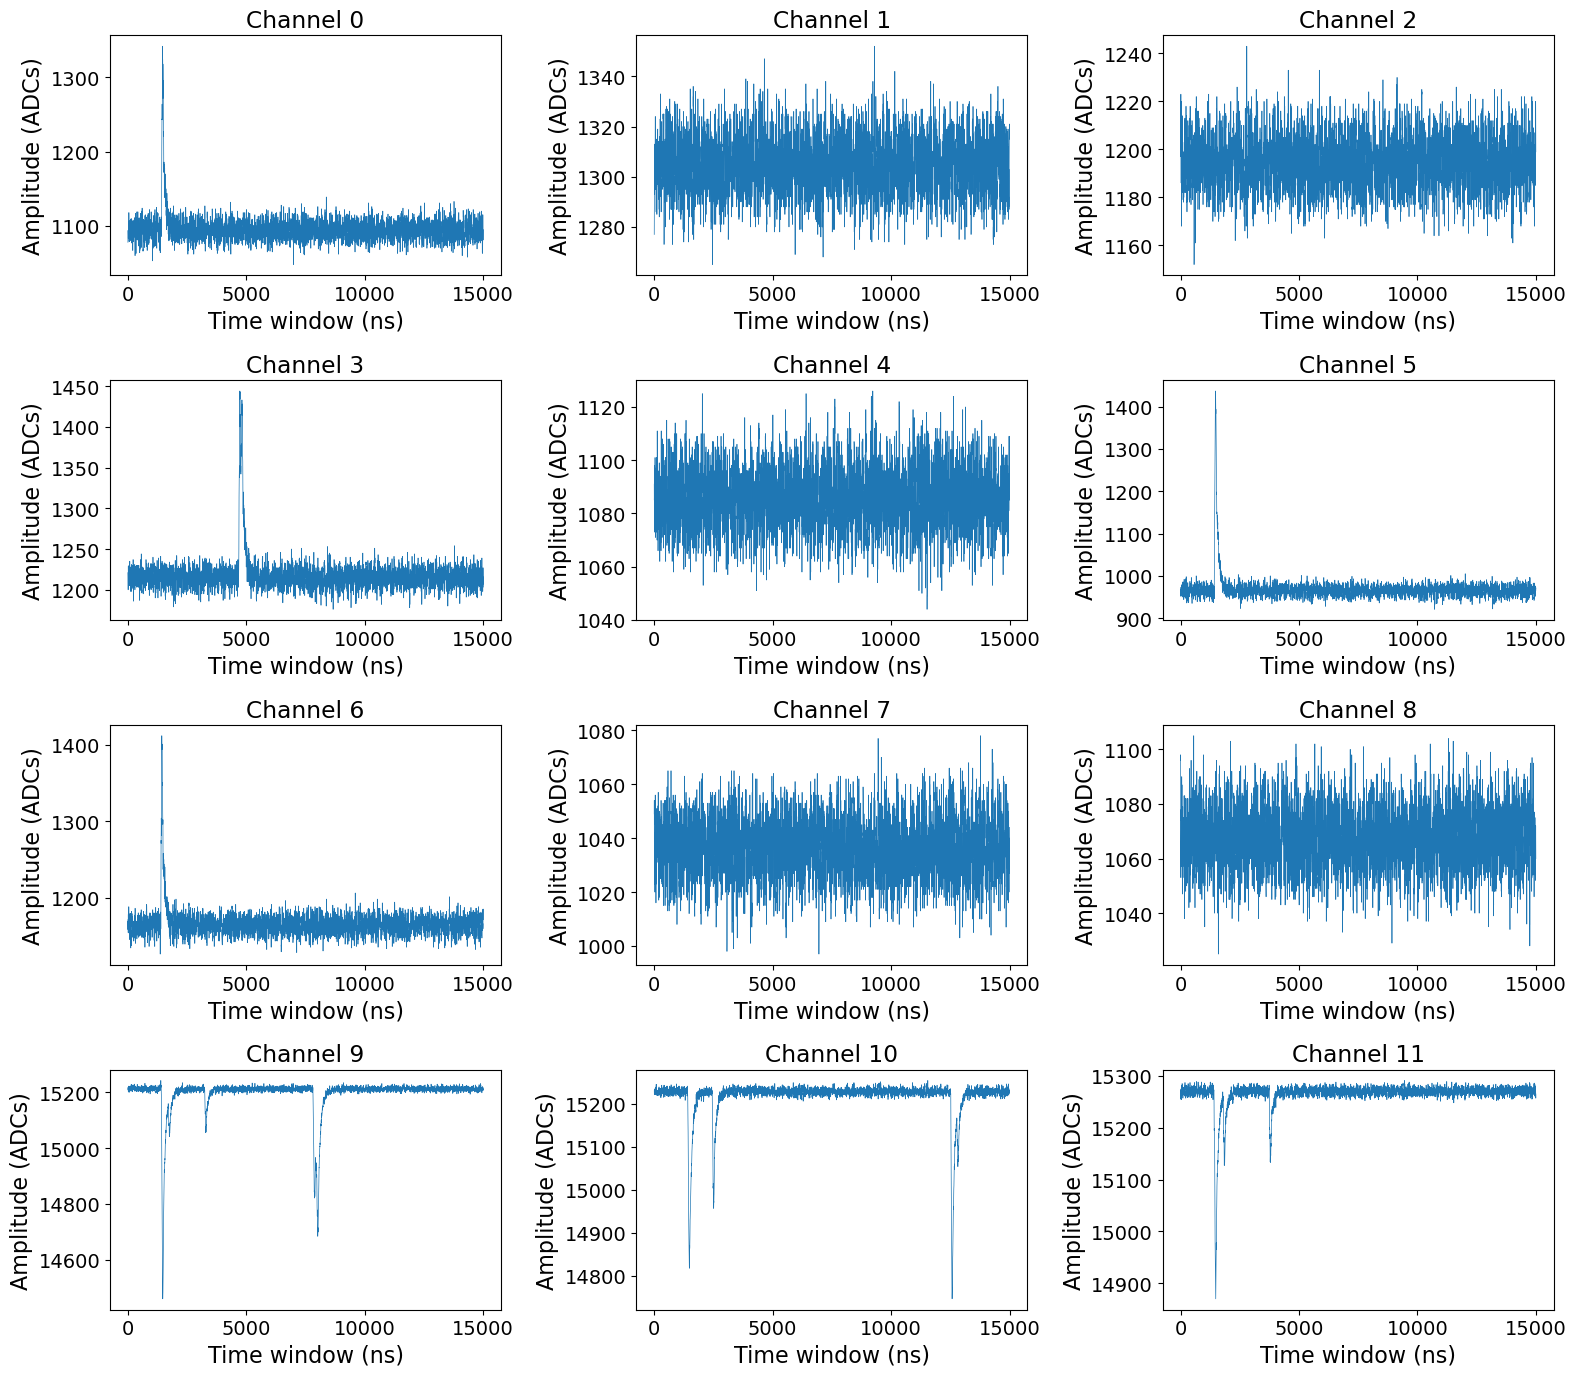

In [6]:
choose_evt = 4
fig, axs = plt.subplots(4, 3, figsize=(16, 14))
for k in range(12):
    #if k==3: continue
    i = int(k/3)
    j = k%3
    wf = np.array(RawTree[f'chan{k}/rdigi'].array())[choose_evt]
    axs[i][j].plot(2*np.arange(len(wf)), wf, linewidth=0.5)
    axs[i][j].set_xlabel('Time window (ns)', fontsize=16)
    axs[i][j].set_ylabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_title(f"Channel {k}")
plt.tight_layout()
plt.show()

### Sum of all the events in a file

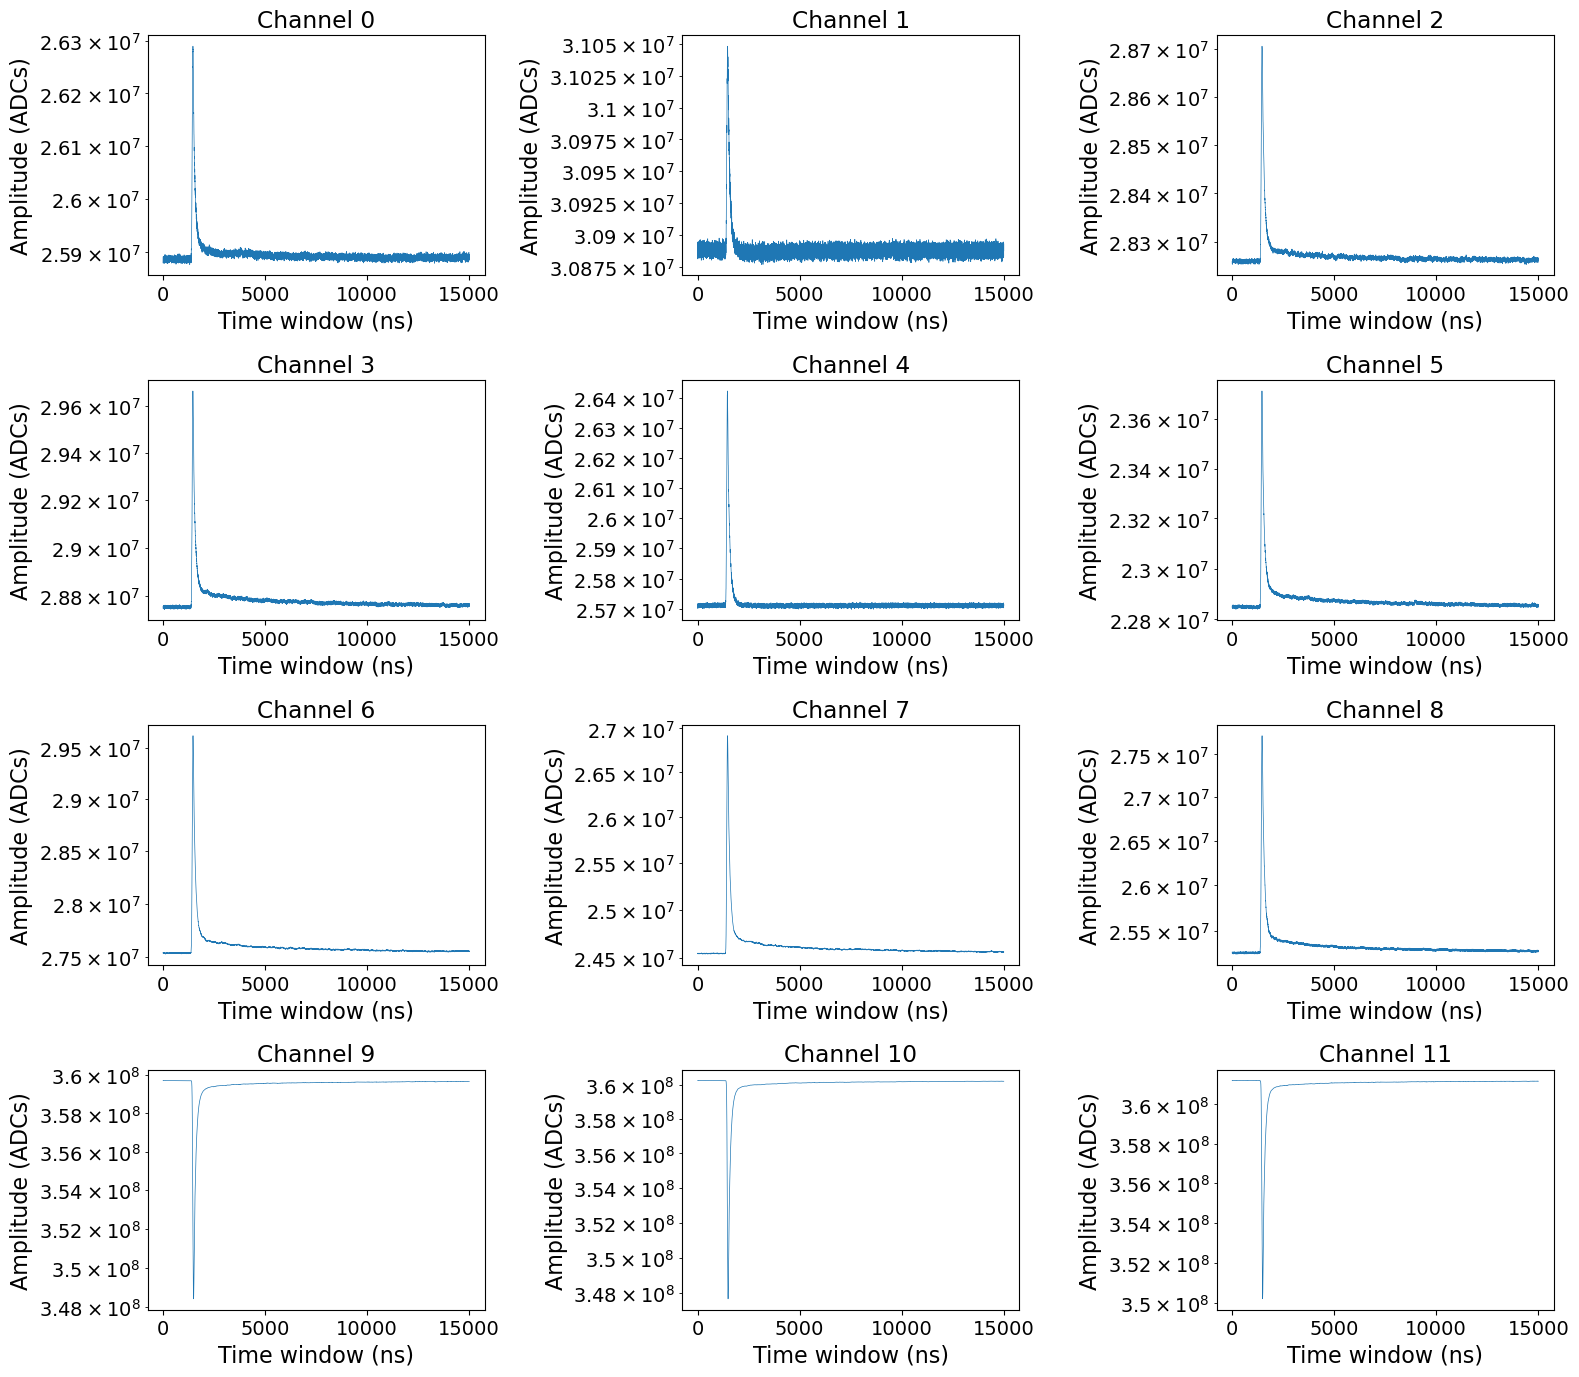

In [7]:
fig, axs = plt.subplots(4, 3, figsize=(16, 14))
for k in range(12):
    i = int(k/3)
    j = k%3
    sum_wf = np.sum(np.array(RawTree[f'chan{k}/rdigi'].array())[:], axis=0)
    axs[i][j].plot(2*np.arange(len(sum_wf)), sum_wf, linewidth=0.5)
    axs[i][j].set_xlabel('Time window (ns)', fontsize=16)
    axs[i][j].set_ylabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_title(f"Channel {k}")
    axs[i][j].set_yscale('log')
plt.tight_layout()
plt.show()

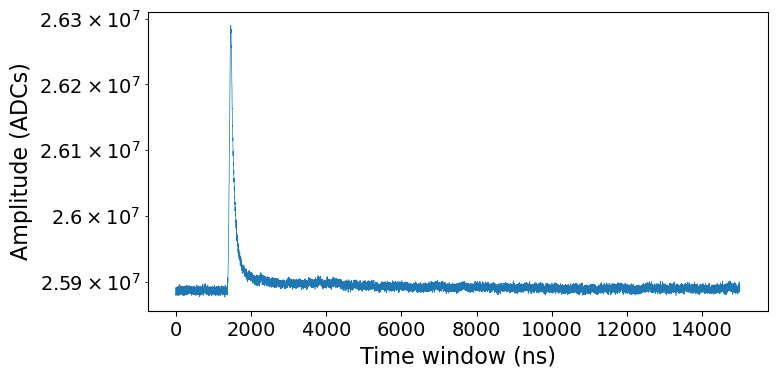

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sum_wf = np.sum(np.array(RawTree[f'chan0/rdigi'].array())[:], axis=0)
ax.plot(2*np.arange(len(sum_wf)), sum_wf, linewidth=0.5)
ax.set_xlabel('Time window (ns)', fontsize=16)
ax.set_ylabel('Amplitude (ADCs)', fontsize=16)
ax.set_yscale('log')
plt.tight_layout()
plt.show()

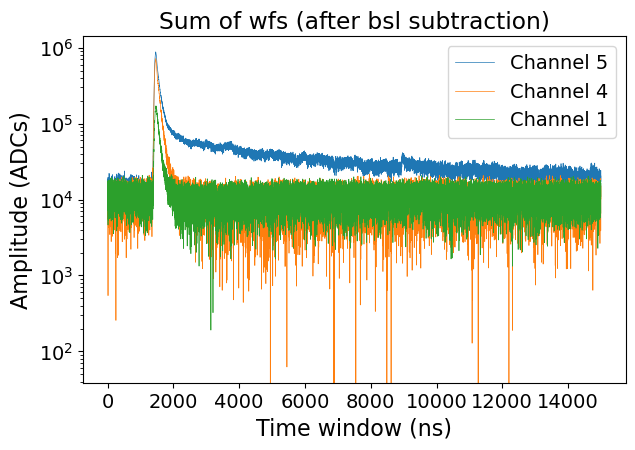

In [9]:
plt.figure(figsize=(7, 4.5))
for channel in [5, 4, 1]:
    all_wfs = np.array(RawTree[f'chan{channel}/rdigi'].array())
    subt_wf = pf.subtract_baseline(all_wfs, mode=True, wf_range_bsl=(0, 500))
    sum_wf  = np.sum(subt_wf, axis=0)
    plt.plot(2*np.arange(len(sum_wf)), sum_wf, linewidth=0.5, label=f'Channel {channel}')
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADCs)', fontsize=16)
plt.title(f"Sum of wfs (after bsl subtraction)")
plt.yscale('log')
plt.legend()
plt.show()

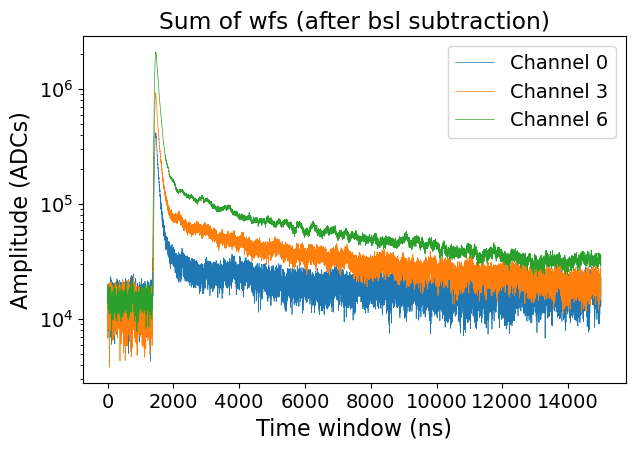

In [10]:
plt.figure(figsize=(7, 4.5))
for channel in [0, 3, 6]:
    all_wfs = np.array(RawTree[f'chan{channel}/rdigi'].array())
    subt_wf = pf.subtract_baseline(all_wfs, mode=True, wf_range_bsl=(0, 500))
    sum_wf  = np.sum(subt_wf, axis=0)
    plt.plot(2*np.arange(len(sum_wf)), sum_wf, linewidth=0.5, label=f'Channel {channel}')
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADCs)', fontsize=16)
plt.title(f"Sum of wfs (after bsl subtraction)")
plt.yscale('log')
plt.legend()
plt.show()

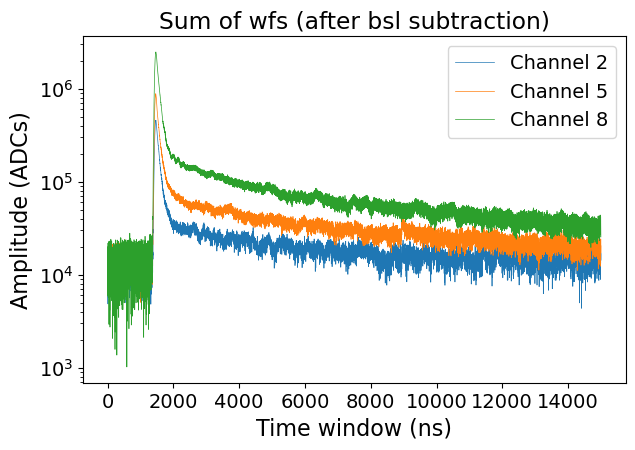

In [11]:
plt.figure(figsize=(7, 4.5))
for channel in [2, 5, 8]:
    all_wfs = np.array(RawTree[f'chan{channel}/rdigi'].array())
    subt_wf = pf.subtract_baseline(all_wfs, mode=True, wf_range_bsl=(0, 500))
    sum_wf  = np.sum(subt_wf, axis=0)
    plt.plot(2*np.arange(len(sum_wf)), sum_wf, linewidth=0.5, label=f'Channel {channel}')
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADCs)', fontsize=16)
plt.title(f"Sum of wfs (after bsl subtraction)")
plt.yscale('log')
plt.legend()
plt.show()

### Looking at the different rows

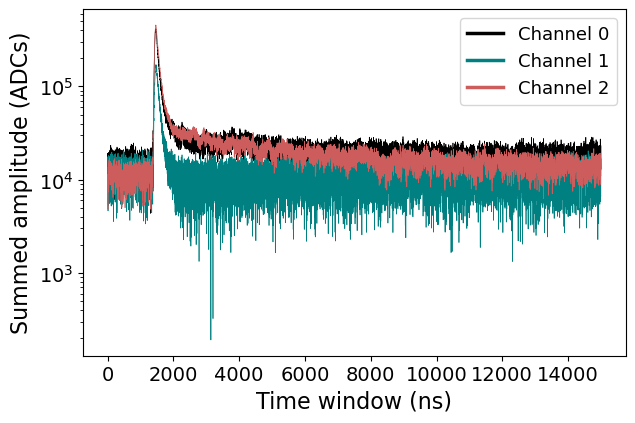

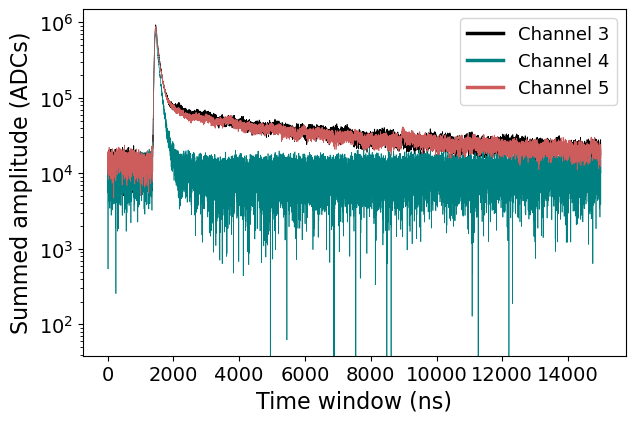

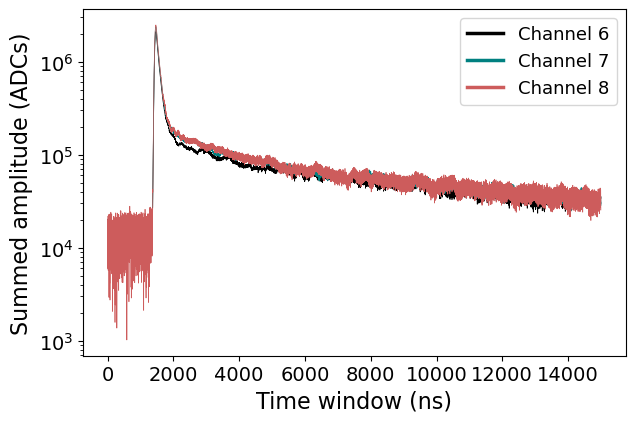

In [12]:
for ch_row in [[0, 1, 2], [3, 4, 5], [6, 7, 8]]:
    plt.figure(figsize=(7, 4.5))
    for channel, col in zip(ch_row, ['k', 'teal', 'indianred']):
        all_wfs = np.array(RawTree[f'chan{channel}/rdigi'].array())
        subt_wf = pf.subtract_baseline(all_wfs, mode=True, wf_range_bsl=(0, 500))
        sum_wf  = np.sum(subt_wf, axis=0)
        plt.plot(2*np.arange(len(sum_wf)), sum_wf, linewidth=0.5, label=f'Channel {channel}', color=col)
    plt.xlabel('Time window (ns)',        fontsize=16)
    plt.ylabel('Summed amplitude (ADCs)', fontsize=16)
    plt.yscale('log')
    plt.legend()
    leg = plt.legend(ncol=1, fontsize=13)
    for line in leg.get_lines():
        line.set_linewidth(2.5)
    plt.show()

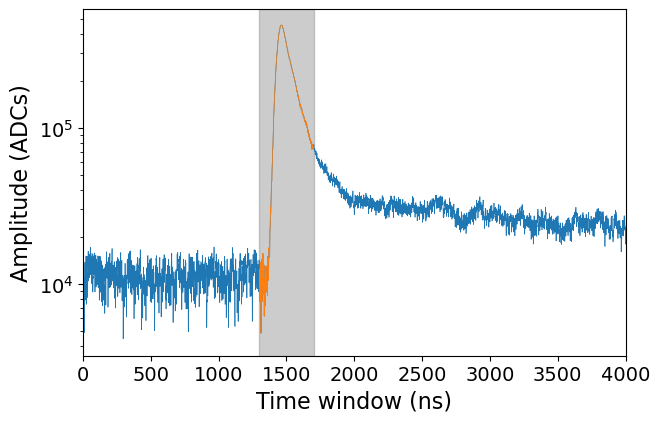

In [13]:
plt.figure(figsize=(7, 4.5))
channel = 2
all_wfs = np.array(RawTree[f'chan{channel}/rdigi'].array())
subt_wf = pf.subtract_baseline(all_wfs, mode=True, wf_range_bsl=(0, 500))
sum_wf  = np.sum(subt_wf, axis=0)
plt.plot(2*np.arange(len(sum_wf)), sum_wf, linewidth=0.5)
plt.plot(2*650+2*np.arange(len(sum_wf[650:850])), sum_wf[650:850], linewidth=0.5)
plt.axvspan(650*2, 850*2, color='grey', alpha=0.4)
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADCs)', fontsize=16)
plt.yscale('log')
plt.xlim(0, 4000)
plt.show()

### Analysis npz

In [14]:
evts_path = '/Users/romoluque_c/LEGEND/BACON/data_npz/'

all_channels = 9

peak_heights = {}

pos_date1 = 42
pos_date2 = 52

def get_date(filename):
    date_str = filename[pos_date1:pos_date2]
    date = datetime.strptime(date_str, '%m_%d_%Y')
    return date

files        = os.listdir(evts_path)
filt_files   = [file for file in files if file.startswith("BACoN_sig_processing_cal_using_height")]
sorted_files = sorted(filt_files, key=get_date)

for filename in sorted_files:
    my_file = evts_path+filename
    d = np.load(my_file, allow_pickle=True)
    
    date = filename[pos_date1:pos_date2]
    
    if date not in peak_heights:
        peak_heights_ch = [np.array([]) for _ in range(all_channels)]

    for channel in range(all_channels):
        peak_heights_ch[channel] = np.concatenate((peak_heights_ch[channel], d['peak_height_all_channels'][channel][0]))
        
    peak_heights[date] = np.array(peak_heights_ch, dtype=object)

In [15]:
peak_heights['11_20_2023'].shape

(9,)

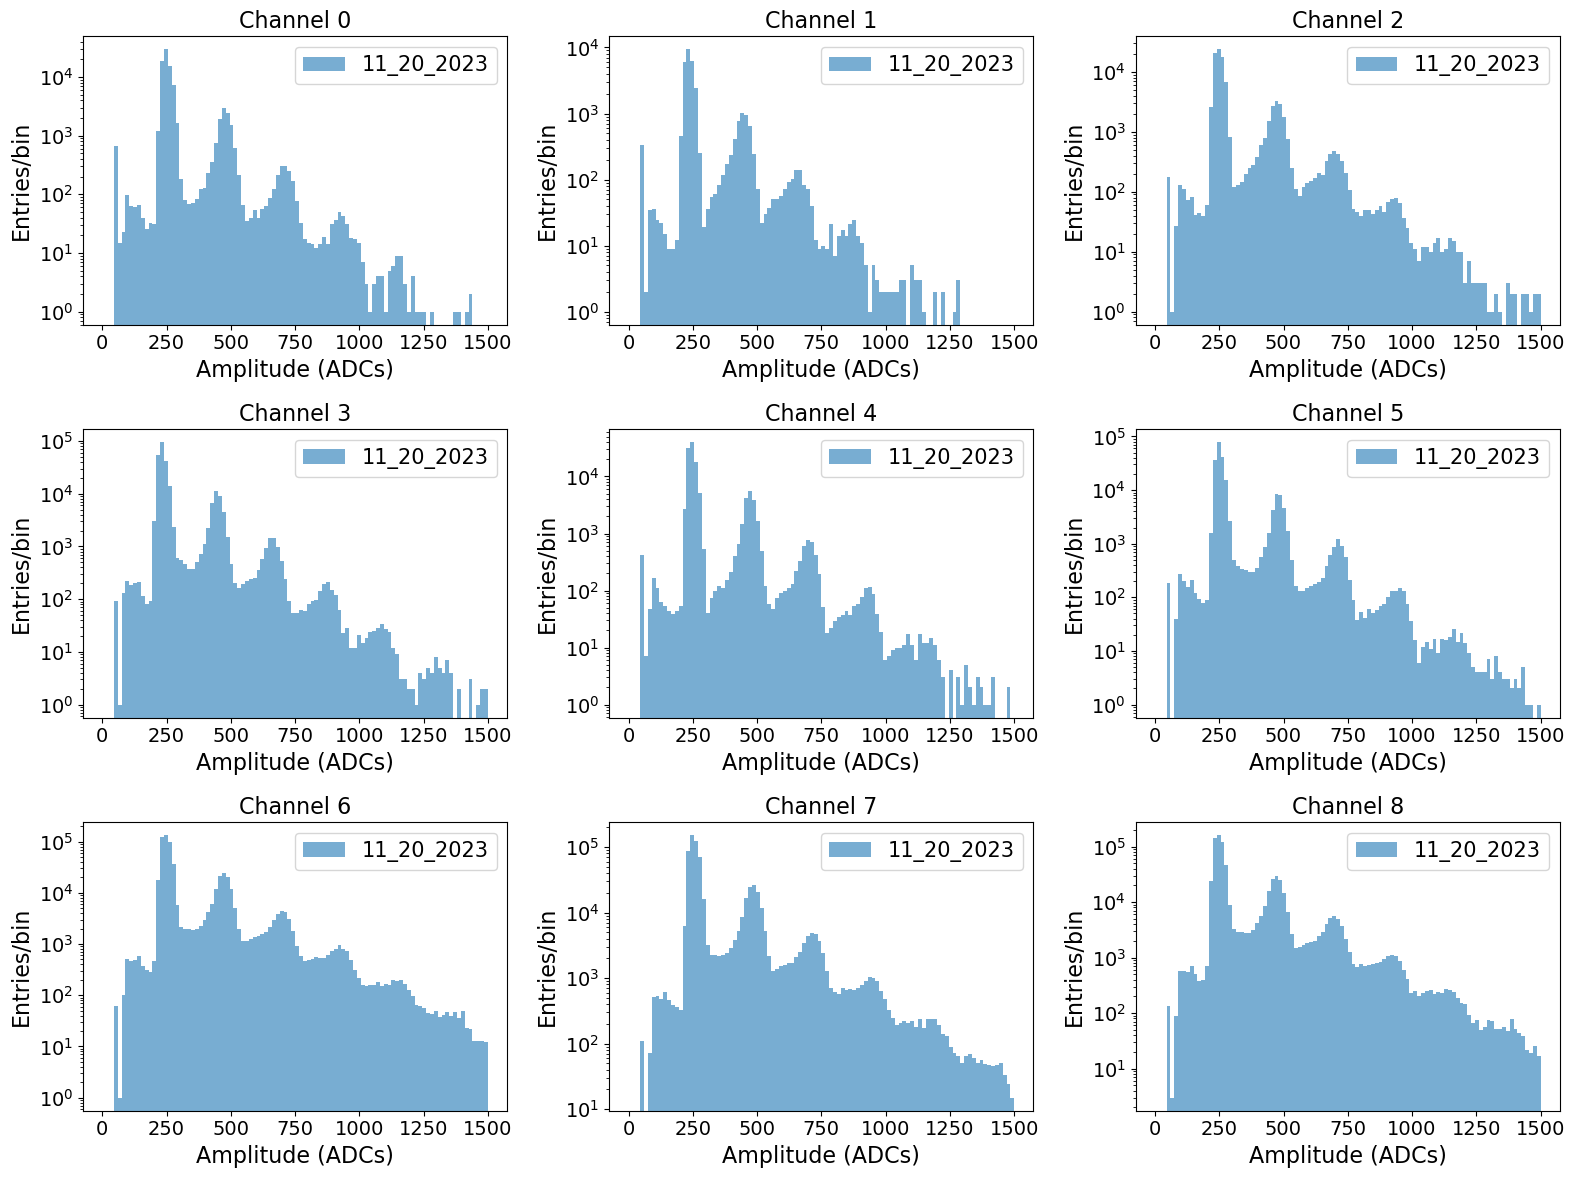

In [32]:
select_date = '11_20_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_heights[select_date][k], bins=100, range=(0,1500), log=True, label=f'{select_date}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()

### Fit spectra

In [17]:
# Define the function for a single Gaussian peak
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

# Define the function for multiple Gaussian peaks
def multi_gaussian(x, *params):
    n_peaks = len(params) // 3
    y = np.zeros_like(x)
    for i in range(n_peaks):
        amplitude = params[i * 3]
        mean = params[i * 3 + 1]
        stddev = params[i * 3 + 2]
        y += gaussian(x, amplitude, mean, stddev)
    return y

def shift_to_bin_centers(x):
    """
    Return bin centers, given bin lower edges.
    """
    return x[:-1] + np.diff(x) * 0.5

def truncate(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

def plot_linear_fit(y, yerr):
    x    = np.arange(len(y))+1
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope*x + intercept
    
    fig = plt.figure(figsize=(8,5))
    plt.errorbar(x, y, yerr=yerr, marker='_', markersize=5, linestyle='', c='k', label=f'Measured gain values')
    plt.plot(x, line, color='r', alpha=0.7, label=f'Fit: y = x*{round(slope, 2)} - {round(np.abs(intercept), 2)}, \n     R$^2$ = {truncate(r_value, 2)}')
    
    plt.xlabel('Peak number')
    plt.ylabel('Mu from fit (ADCs)')
    plt.legend(fontsize=14, loc='upper left')
    plt.show()
    return slope

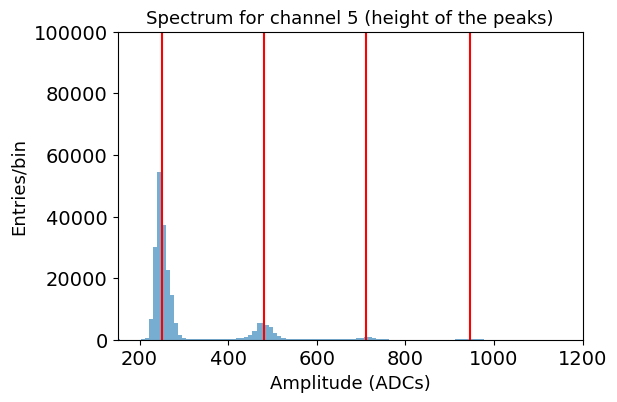

In [105]:
sel_channel = 5

plt.figure(figsize=(6, 4))
y, x, _ = plt.hist(peak_heights[select_date][sel_channel], bins=150, range=(100,1500), log=False, alpha=0.6)
plt.axvline(x=250, color='r')
plt.axvline(x=480, color='r')
plt.axvline(x=710, color='r')
plt.axvline(x=945, color='r')
plt.xlabel('Amplitude (ADCs)',      fontsize=13)
plt.ylabel('Entries/bin',           fontsize=13)
plt.title(f"Spectrum for channel {sel_channel} (height of the peaks)", fontsize=13)
plt.xlim(150, 1200)
plt.ylim(0, 100000)
plt.show()

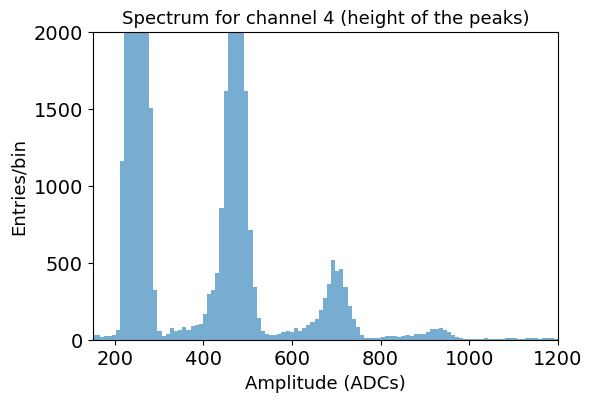

In [19]:
sel_channel = 4

plt.figure(figsize=(6, 4))
y, x, _ = plt.hist(peak_heights[select_date][sel_channel], bins=150, range=(100,1500), log=False, alpha=0.6)
plt.xlabel('Amplitude (ADCs)',      fontsize=13)
plt.ylabel('Entries/bin',           fontsize=13)
plt.title(f"Spectrum for channel {sel_channel} (height of the peaks)", fontsize=13)
plt.xlim(150, 1200)
plt.ylim(0, 2000)
plt.show()

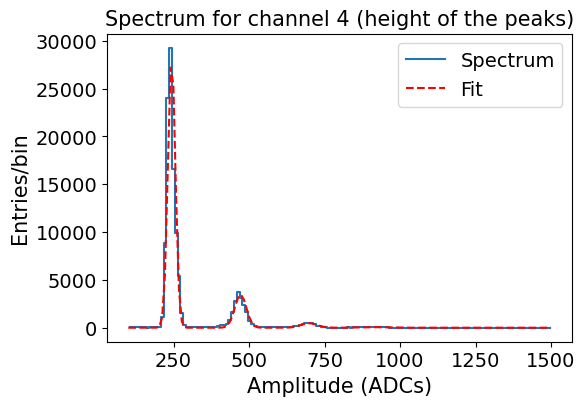

In [20]:
initial_guess = [5000, 240, 20, 1000, 470, 25, 100, 700, 30, 100, 920, 50]  # Initial guess for the parameters
popt, pcov = curve_fit(multi_gaussian, shift_to_bin_centers(x), y, p0=initial_guess)

perr = np.sqrt(np.diag(pcov))

all_means     = np.array([popt[i*3+1] for i in range(len(popt)//3)])
all_means_err = np.array([perr[i*3+1] for i in range(len(perr)//3)])

plt.figure(figsize=(6, 4))
plt.step(shift_to_bin_centers(x), y, label='Spectrum')
plt.plot(x, multi_gaussian(x, *popt), 'r--', label='Fit')
plt.xlabel('Amplitude (ADCs)',      fontsize=15)
plt.ylabel('Entries/bin',           fontsize=15)
plt.title(f"Spectrum for channel {sel_channel} (height of the peaks)", fontsize=15)
plt.legend()
plt.show()

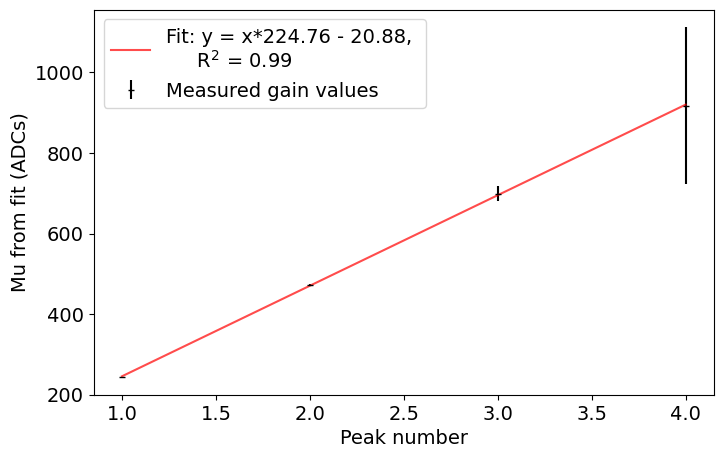

224.75930337940463

In [21]:
plot_linear_fit(all_means, all_means_err)

In [22]:
def fit_spectrum_and_plot(data, channel=7, initial_guess=[1000, 100, 20]):
    
    plt.figure(figsize=(7, 5))
    y, x, _ = plt.hist(data, bins=150, range=(100,1500), log=False, alpha=0.6)

    popt, pcov = curve_fit(multi_gaussian, shift_to_bin_centers(x), y, p0=initial_guess)
    
    plt.plot(x, multi_gaussian(x, *popt), 'r--', label='Fit')
    plt.xlabel('Amplitude (ADCs)',      fontsize=15)
    plt.ylabel('Entries/bin',           fontsize=15)
    plt.title(f"Spectrum for channel {sel_channel} (height of the peaks)", fontsize=15)
    plt.tight_layout()
    plt.show()
    
    perr = np.sqrt(np.diag(pcov))
    
    all_means     = np.array([popt[i*3+1] for i in range(len(popt)//3)])
    all_means_err = np.array([perr[i*3+1] for i in range(len(perr)//3)])
    
    return plot_linear_fit(all_means, all_means_err)

In [107]:
initial_guess_ch = {0: [ 15000, 245, 20,  2000, 475, 25,  200, 710, 30,  20, 925, 40],
                    1: [  6000, 235, 20,   600, 445, 25,  100, 650, 30,  20, 870, 40],
                    2: [ 16000, 250, 20,  2000, 475, 25,  400, 700, 30,  50, 925, 40],
                    3: [ 60000, 230, 20,  8000, 445, 25, 1000, 660, 30, 100, 875, 40],
                    4: [ 30000, 245, 20,  4000, 475, 25,  500, 700, 30,  70, 935, 40],
                    5: [ 50000, 250, 20,  5000, 480, 25,  700, 710, 30, 100, 945, 40],
                    6: [ 90000, 245, 20, 18000, 470, 25, 3000, 700, 30, 500, 920, 40],
                    7: [100000, 250, 20, 16000, 485, 25,  500, 710, 30, 500, 950, 40],
                    8: [110000, 245, 20, 20000, 475, 25, 4000, 700, 30, 600, 920, 40]}

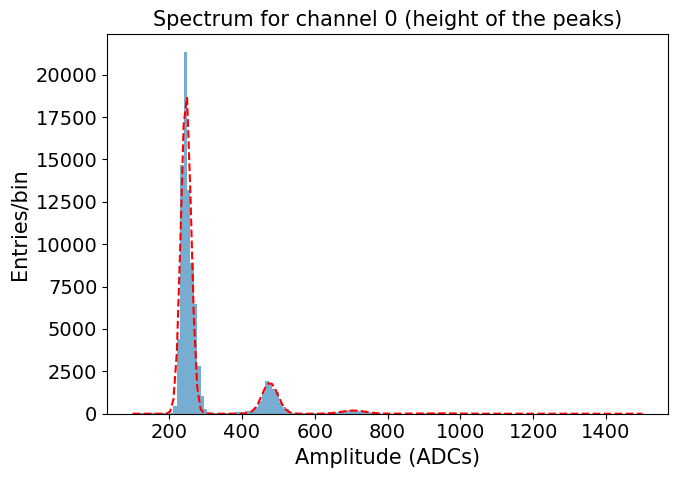

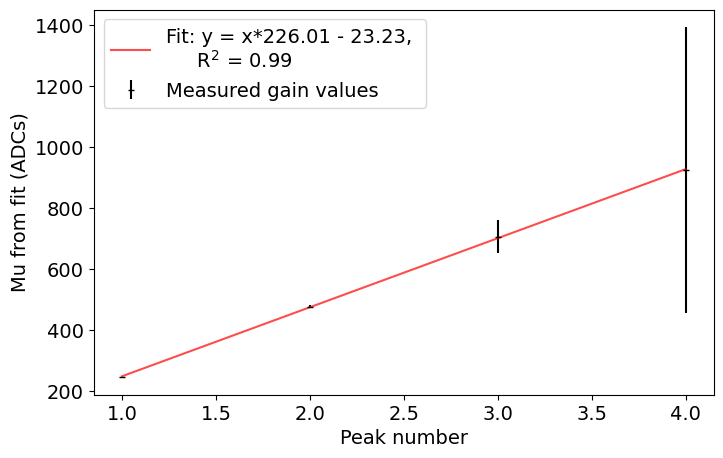

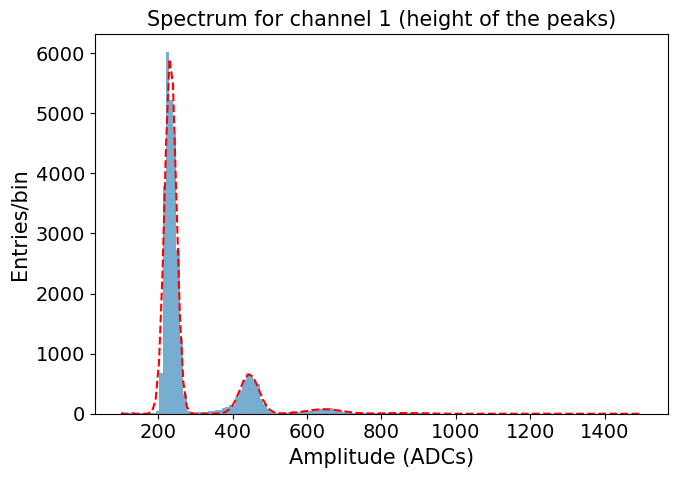

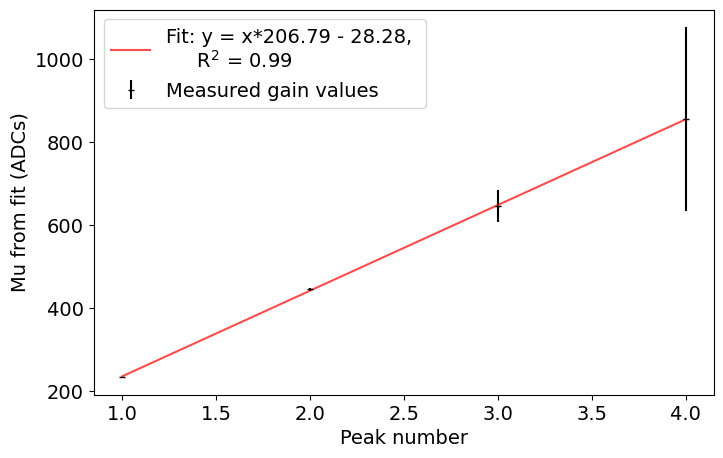

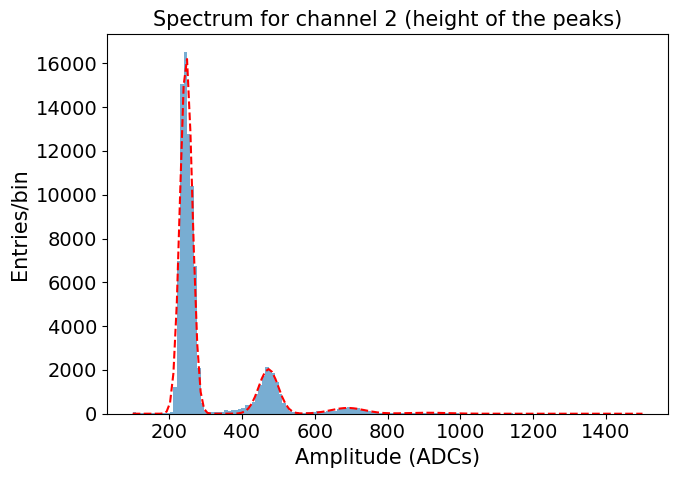

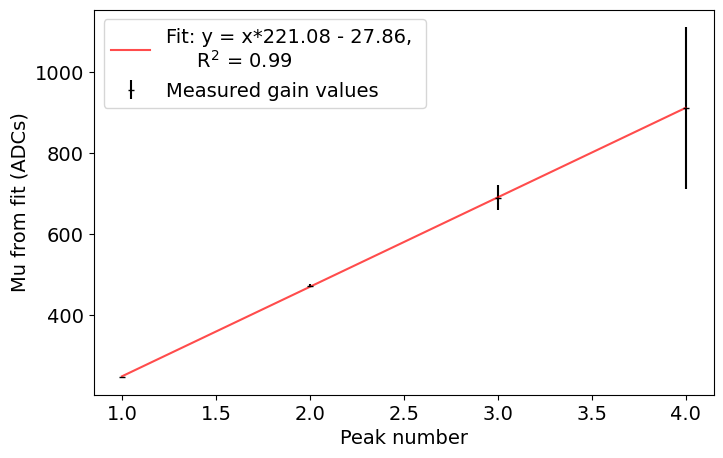

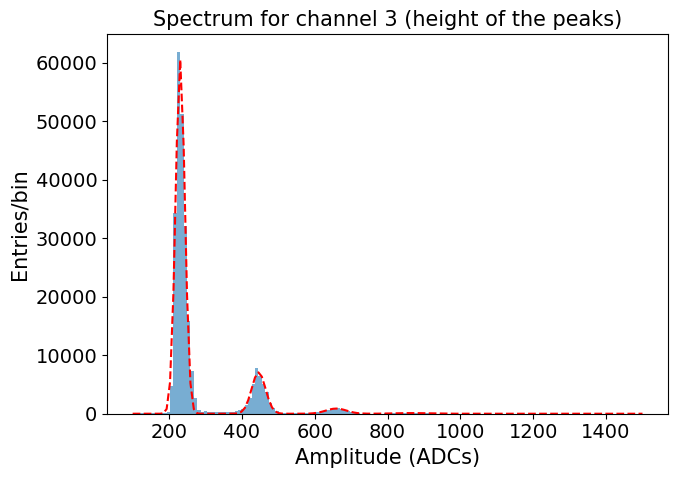

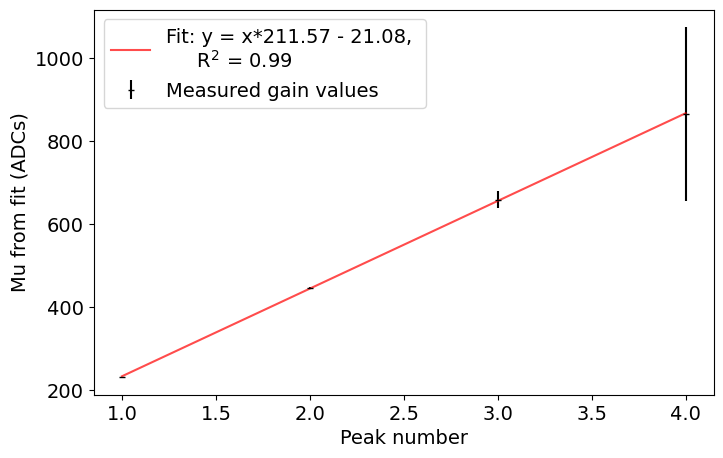

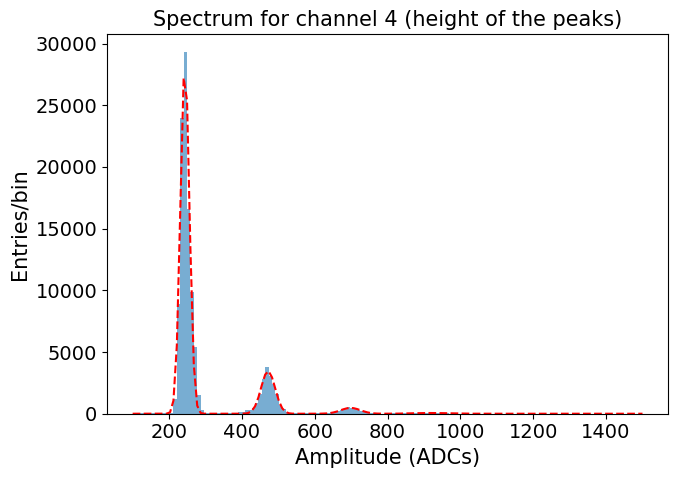

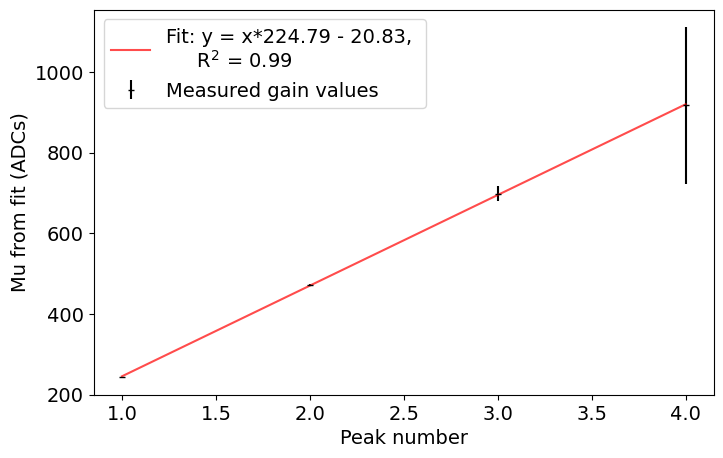

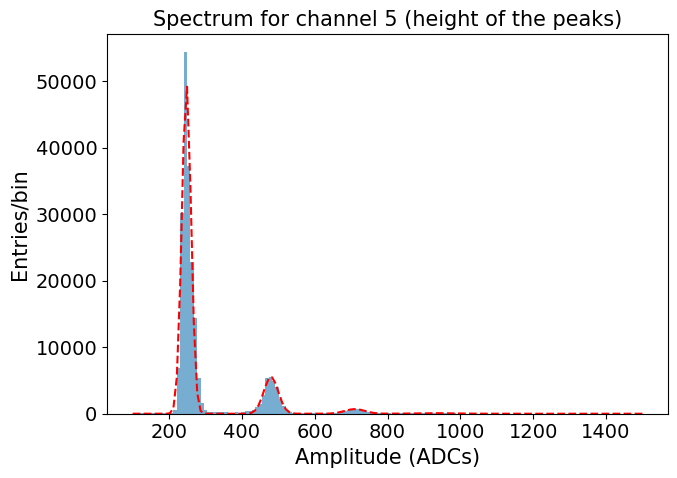

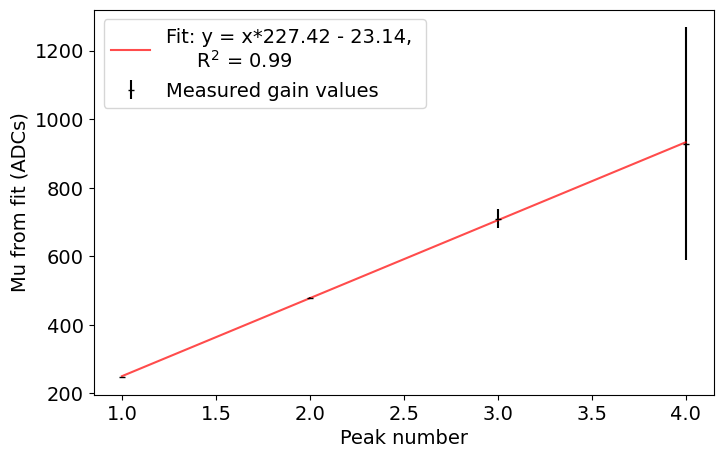

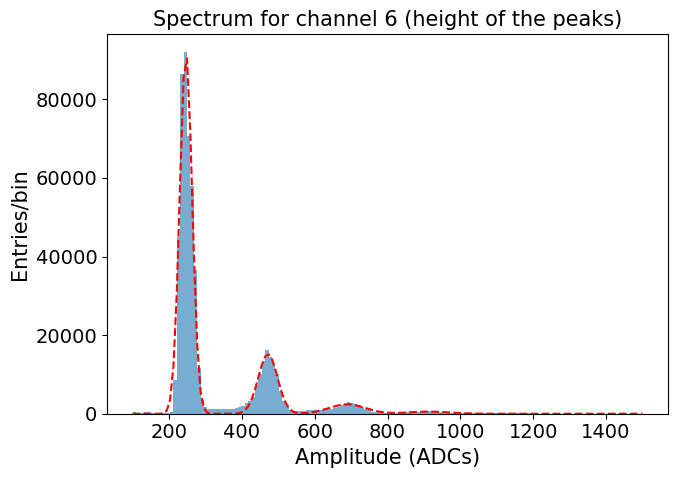

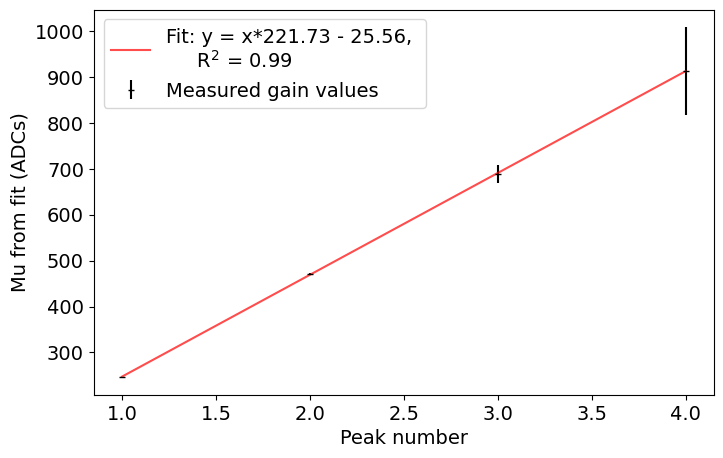

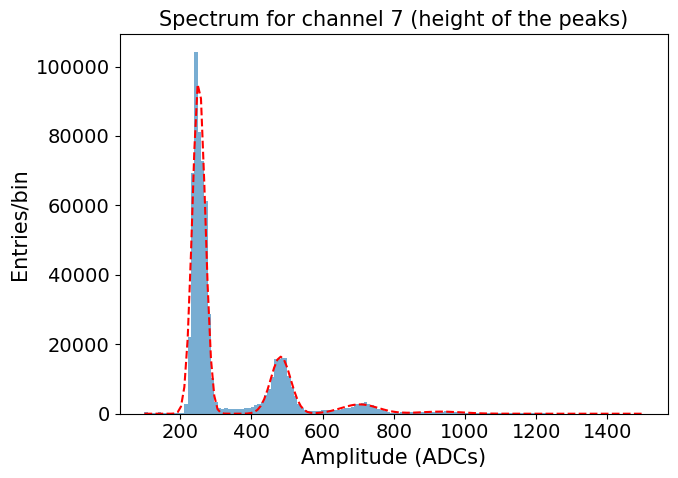

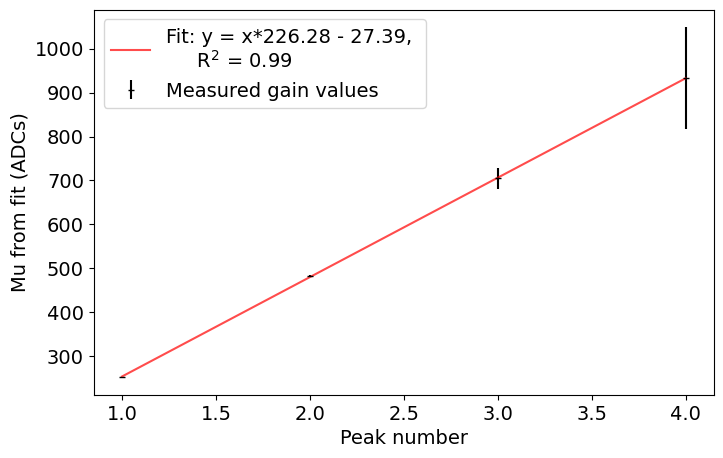

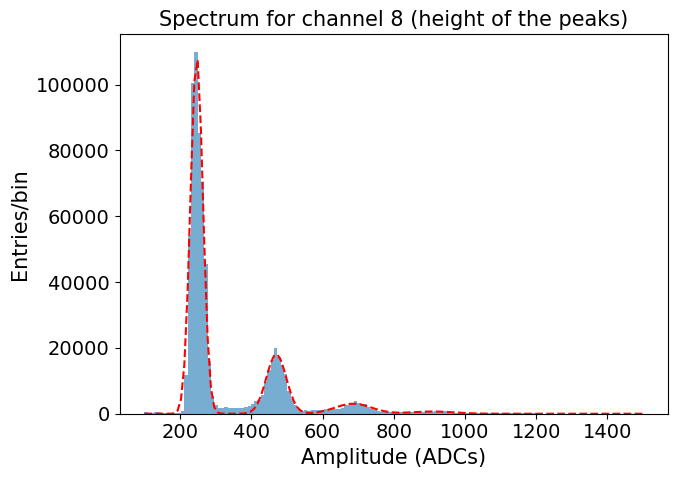

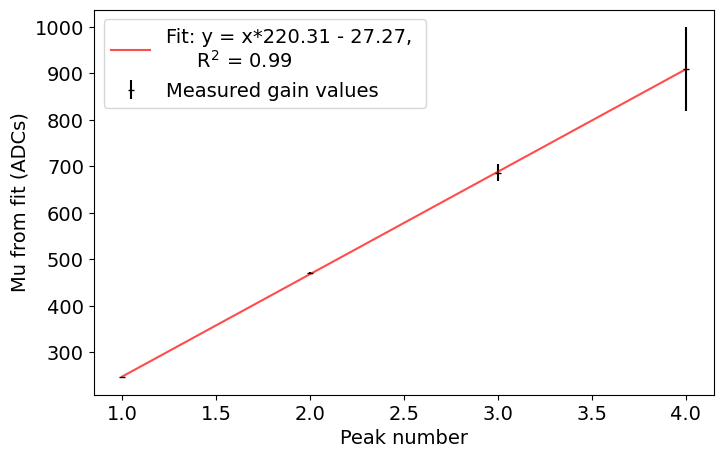

In [108]:
all_slopes = {}
for sel_date in peak_heights.keys():
    slope_ch = []
    for sel_channel in range(9):
        try:
            slope = fit_spectrum_and_plot(peak_heights[sel_date][sel_channel], channel=sel_channel, initial_guess=initial_guess_ch[sel_channel])
            slope_ch.append(slope)
        except RuntimeError:
            slope_ch.append(0)
            continue
            
    all_slopes[sel_date] = np.array(slope_ch)

In [109]:
all_slopes

{'11_20_2023': array([226.00663934, 206.7871513 , 221.07788724, 211.56947489,
        224.78729245, 227.41737901, 221.73063328, 226.28395664,
        220.30802631])}

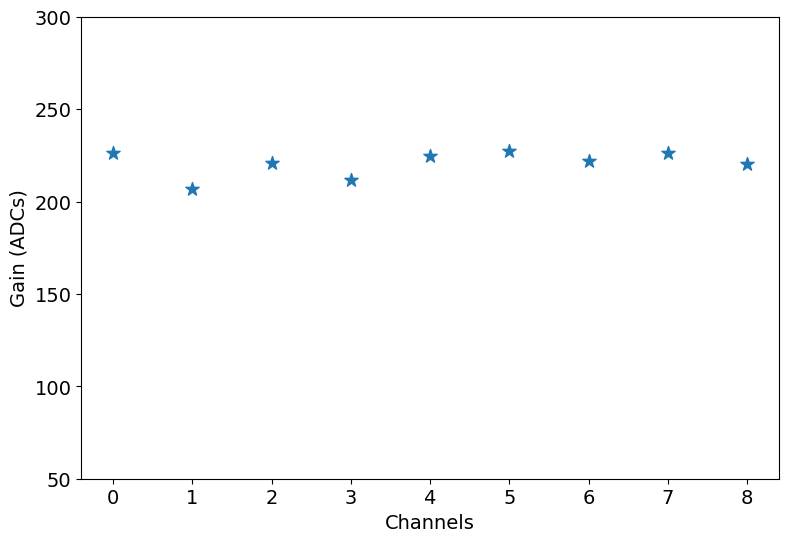

In [110]:
plt.scatter(range(9), all_slopes['11_20_2023'], marker='*', s=100)
plt.ylim(50, 300)
plt.xlabel('Channels')
plt.ylabel('Gain (ADCs)')
plt.show()

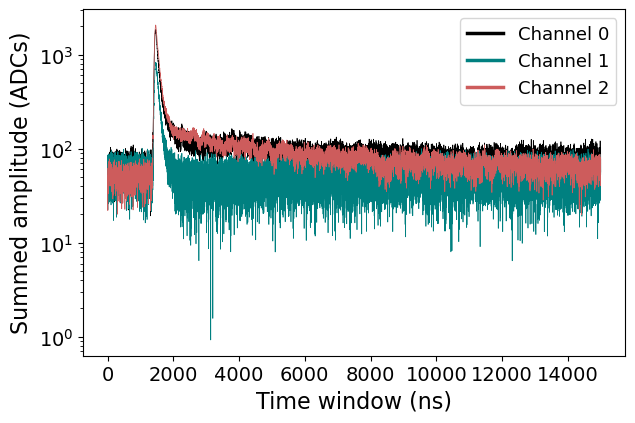

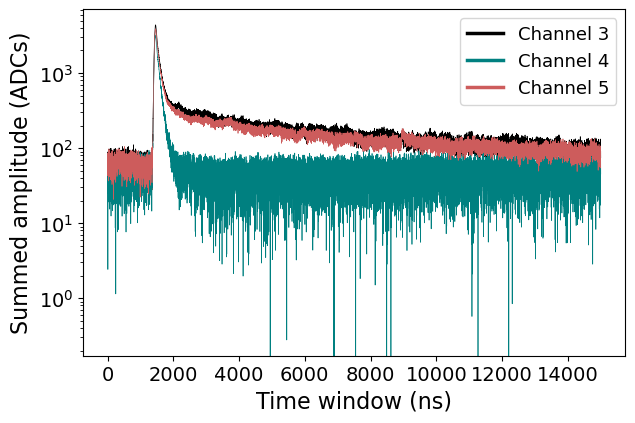

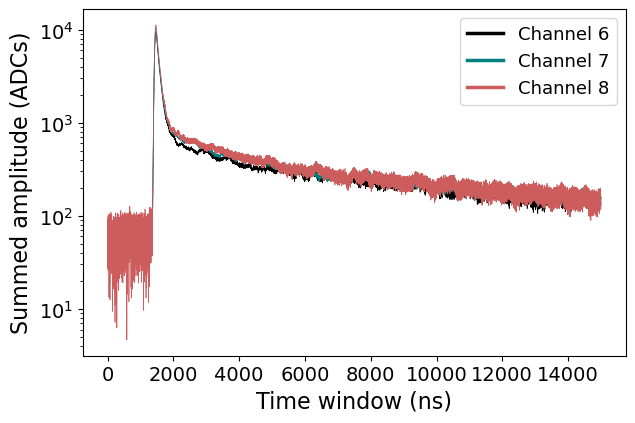

In [111]:
for ch_row in [[0, 1, 2], [3, 4, 5], [6, 7, 8]]:
    plt.figure(figsize=(7, 4.5))
    for channel, col in zip(ch_row, ['k', 'teal', 'indianred']):
        all_wfs = np.array(RawTree[f'chan{channel}/rdigi'].array())
        subt_wf = pf.subtract_baseline(all_wfs, mode=True, wf_range_bsl=(0, 500))
        sum_wf  = np.sum(subt_wf, axis=0)/all_slopes['11_20_2023'][channel]
        plt.plot(2*np.arange(len(sum_wf)), sum_wf, linewidth=0.5, label=f'Channel {channel}', color=col)
    plt.xlabel('Time window (ns)',        fontsize=16)
    plt.ylabel('Summed amplitude (ADCs)', fontsize=16)
    plt.yscale('log')
    plt.legend()
    leg = plt.legend(ncol=1, fontsize=13)
    for line in leg.get_lines():
        line.set_linewidth(2.5)
    plt.show()

<Figure size 700x450 with 0 Axes>

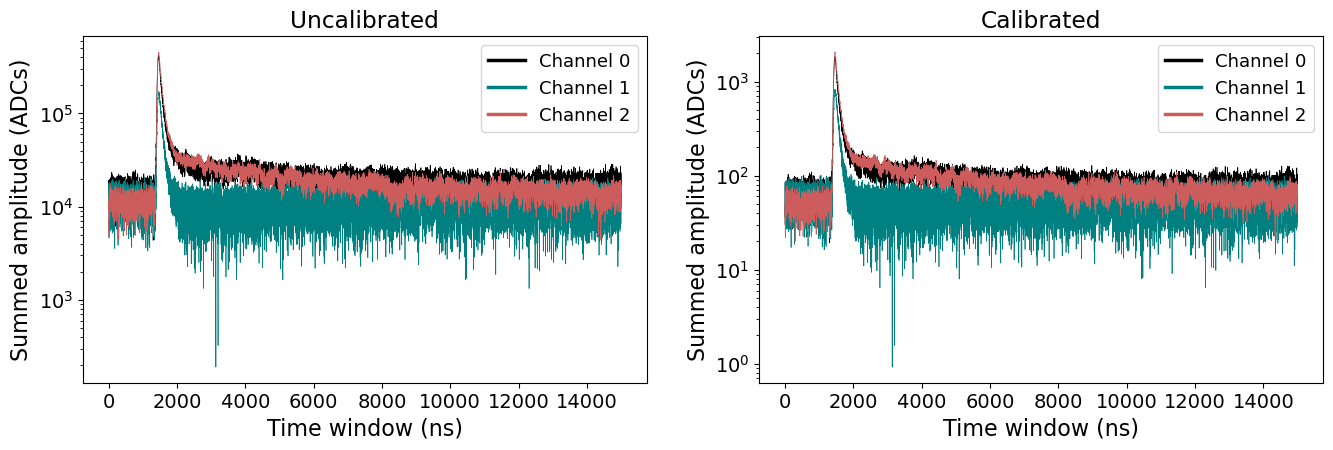

<Figure size 700x450 with 0 Axes>

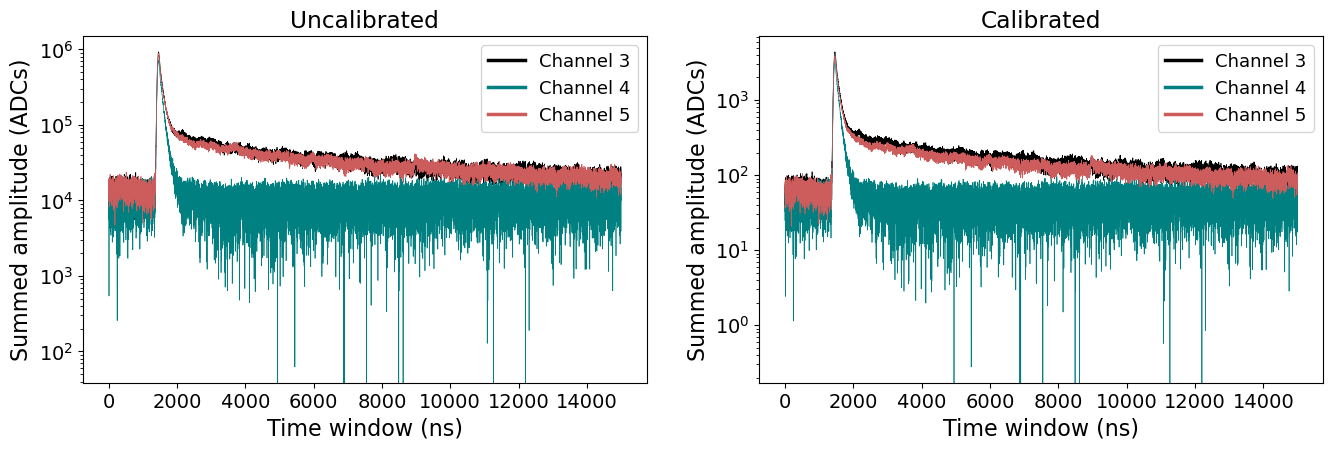

<Figure size 700x450 with 0 Axes>

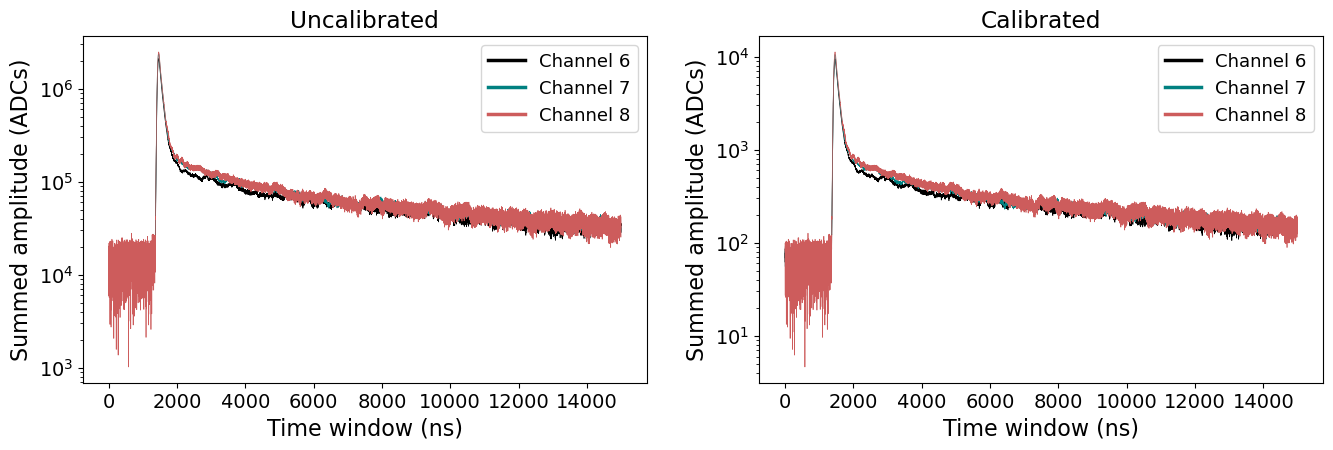

In [112]:
for ch_row in [[0, 1, 2], [3, 4, 5], [6, 7, 8]]:
    plt.figure(figsize=(7, 4.5))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4.5))
    for channel, col in zip(ch_row, ['k', 'teal', 'indianred']):
        all_wfs = np.array(RawTree[f'chan{channel}/rdigi'].array())
        subt_wf = pf.subtract_baseline(all_wfs, mode=True, wf_range_bsl=(0, 500))
        sum_wf  = np.sum(subt_wf, axis=0)
        ax1.plot(2*np.arange(len(sum_wf)), sum_wf, linewidth=0.5, label=f'Channel {channel}', color=col)
        ax2.plot(2*np.arange(len(sum_wf)), sum_wf/all_slopes['11_20_2023'][channel], linewidth=0.5, label=f'Channel {channel}', color=col)
    ax1.set_xlabel('Time window (ns)',        fontsize=16)
    ax1.set_ylabel('Summed amplitude (ADC)', fontsize=16)
    ax1.set_yscale('log')
    ax1.set_title('Uncalibrated')
    leg = ax1.legend(ncol=1, fontsize=13)
    for line in leg.get_lines():
        line.set_linewidth(2.5)
    ax2.set_xlabel('Time window (ns)',        fontsize=16)
    ax2.set_ylabel('Summed amplitude (pe)', fontsize=16)
    ax2.set_yscale('log')
    ax2.set_title('Calibrated')
    leg = ax2.legend(ncol=1, fontsize=13)
    for line in leg.get_lines():
        line.set_linewidth(2.5)
    plt.show()

In [113]:
gains_dark_box_vb55 = np.array([134.57801821, 133.68639542, 136.39412143, 138.11533159,
                                140.29249586, 136.46477923, 131.27390486, 127.56319275,
                                130.72306411, 139.4783214 , 142.0017588 , 165.5407446])
gains_dark_box_vb56 = np.array([174.03107833, 172.96599152, 176.42412688, 179.54566931,
                                179.21006561, 179.21814564, 177.77043258, 166.97475842,
                                173.60047227, 184.8525647 , 181.81694524, 186.04528817])

In [114]:
gains_BACoN = all_slopes['11_20_2023']

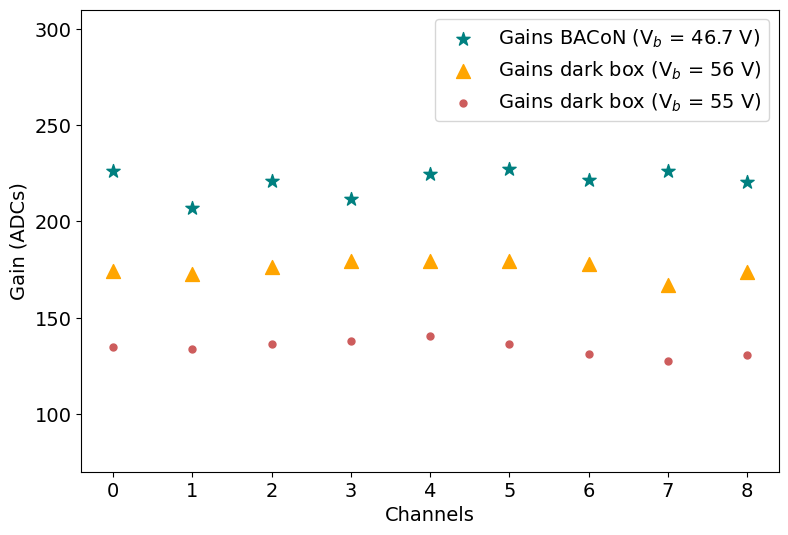

In [116]:
plt.scatter(range(9), gains_BACoN,             marker='*', s=100, label='Gains BACoN (V$_b$ = 46.7 V)' , color='teal')
plt.scatter(range(9), gains_dark_box_vb56[:9], marker='^', s=100, label='Gains dark box (V$_b$ = 56 V)', color='orange')
plt.scatter(range(9), gains_dark_box_vb55[:9], marker='.', s=100, label='Gains dark box (V$_b$ = 55 V)', color='indianred')
plt.ylim(70, 310)
plt.xlabel('Channels')
plt.ylabel('Gain (ADCs)')
plt.legend()
plt.show()

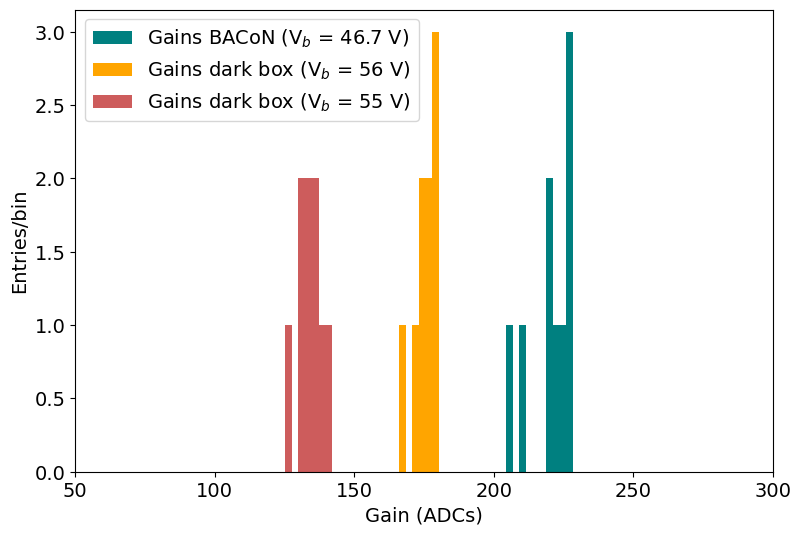

In [123]:
plt.hist(gains_BACoN,             bins=100, range=(70, 310), label='Gains BACoN (V$_b$ = 46.7 V)' , color='teal')
plt.hist(gains_dark_box_vb56[:9], bins=100, range=(70, 310), label='Gains dark box (V$_b$ = 56 V)', color='orange')
plt.hist(gains_dark_box_vb55[:9], bins=100, range=(70, 310), label='Gains dark box (V$_b$ = 55 V)', color='indianred')
plt.xlim(50, 300)
plt.xlabel('Gain (ADCs)')
plt.ylabel('Entries/bin')
plt.legend(loc=2)
plt.show()